## Import packages and configure logs

In [1]:
import os
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import logging
import sys

from multiprocessing import Pool
from functools import partial

sys.path.append('..')
from preprocessing.helper.helpers import *

root = logging.getLogger()
root.setLevel(logging.INFO)
DATA_PATH = '../../data/pcaps/csv/'
N_PROCESESS = 8

handler = logging.StreamHandler(sys.stdout)
handler.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(levelname)s - %(asctime)s: %(message)s')
handler.setFormatter(formatter)
root.addHandler(handler)
logging.info('Packages and logging up and running!')

INFO - 2019-05-26 09:06:18,324: Packages and logging up and running!


## Read all the data and concatenate

**Note**: Only run once!

In [2]:
def read_csv(filename, path):
    logging.info(f'Loading file {filename}')
    return pd.read_csv(os.path.join(DATA_PATH, filename),
                       sep='\t',
                       parse_dates=['Timestamp'],
                      )

files_list = get_file_list(DATA_PATH, 'csv')
pool = Pool(processes=N_PROCESESS)
pool_read_csv = partial(read_csv, path=DATA_PATH)
df_list = pool.map(pool_read_csv, files_list)

data = pd.concat(df_list)
data.index = data['Timestamp']
del df_list

INFO - 2019-05-26 09:06:18,395: Loading file iotpot2_all_subset.pcap.csv
INFO - 2019-05-26 09:06:18,395: Loading file iotpot2_all_subset1.pcap.csv
INFO - 2019-05-26 09:06:18,395: Loading file iotpot2_all_subset10.pcap.csv
INFO - 2019-05-26 09:06:18,396: Loading file iotpot2_all_subset11.pcap.csv
INFO - 2019-05-26 09:06:18,396: Loading file iotpot2_all_subset12.pcap.csv
INFO - 2019-05-26 09:06:18,396: Loading file iotpot2_all_subset13.pcap.csv
INFO - 2019-05-26 09:06:18,396: Loading file iotpot2_all_subset14.pcap.csv
INFO - 2019-05-26 09:06:18,396: Loading file iotpot2_all_subset2.pcap.csv
INFO - 2019-05-26 09:07:07,085: Loading file iotpot2_all_subset3.pcap.csv
INFO - 2019-05-26 09:07:19,704: Loading file iotpot2_all_subset4.pcap.csv
INFO - 2019-05-26 09:07:24,528: Loading file iotpot2_all_subset5.pcap.csv
INFO - 2019-05-26 09:07:29,267: Loading file iotpot2_all_subset6.pcap.csv
INFO - 2019-05-26 09:07:34,131: Loading file iotpot2_all_subset7.pcap.csv
INFO - 2019-05-26 09:07:38,968: Lo

Process ForkPoolWorker-6:
Process ForkPoolWorker-7:
Process ForkPoolWorker-2:
Process ForkPoolWorker-5:
Process ForkPoolWorker-3:
Process ForkPoolWorker-1:
Process ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-8:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/l

### Drop unecessary columns

In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data = data.select_dtypes(include=numerics)
data.head()
data = data.fillna(0)

## Now lets start with the exploration

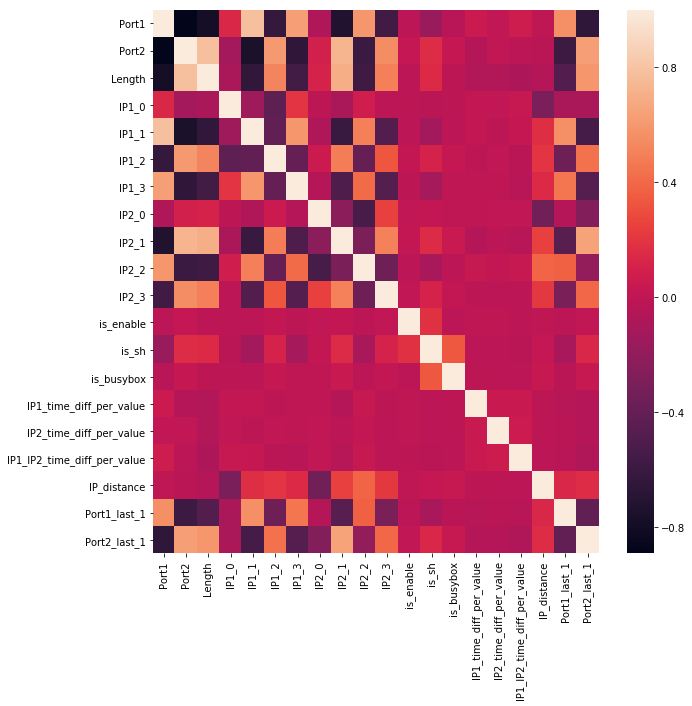

In [4]:
df_corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr)

* Ports are negatively correlated tis migh be due to starting connections beaing above port 44000 and the main port2 being 23 for telnet
* The higher the initial port packet lenght decreases
* The higher source port, Port2_last_1 decreases, meaning that connections might not be port scans
* IP\*_\* seem to be randomly correlated
* Length and destiny port seem to be correlated, higher lengths to higher ports
* Time differences seems to be (highly) uncorrelated to each other
* IP_Distances shows correlation to IP nets and host, meaning that it migh provide valuable information
* Ports_last* are negatively correlated, meaning that usually is one port to many or many to one
* Ports_last* are correlated to length, lower ports connections means lower packets


In [6]:
ip_vars = ['IP1_0', 'IP1_1', 'IP1_2', 'IP1_3', 'IP2_0', 'IP2_1', 'IP2_2', 'IP2_3',]
data = data.drop(ip_vars, axis=1)


KeyError: "['IP1_0' 'IP1_1' 'IP1_2' 'IP1_3' 'IP2_0' 'IP2_1' 'IP2_2' 'IP2_3'] not found in axis"

In [8]:
data.head()

,Port1,Port2,Length,is_enable,is_sh,is_busybox,IP1_time_diff_per_value,IP2_time_diff_per_value,IP1_IP2_time_diff_per_value,IP_distance,Port1_last_1,Port2_last_1
Timestamp,,,,,,,,,,,,
2019-02-01 09:37:56.421462,24858,8649,44,0,0,0,0.0,0.00000,0.0,1.00000,1.0,1.0
2019-02-01 09:37:56.446036,52462,6334,40,0,0,0,0.0,0.00000,0.0,0.93750,1.0,1.0
2019-02-01 09:37:56.512569,43082,23,52,0,0,0,0.0,0.00000,0.0,1.00000,1.0,1.0
2019-02-01 09:37:56.549846,32860,2323,60,0,0,0,0.0,0.10381,0.0,0.96875,1.0,2.0
2019-02-01 09:37:56.550018,45431,23,40,0,0,0,0.0,0.00000,0.0,0.90625,1.0,1.0


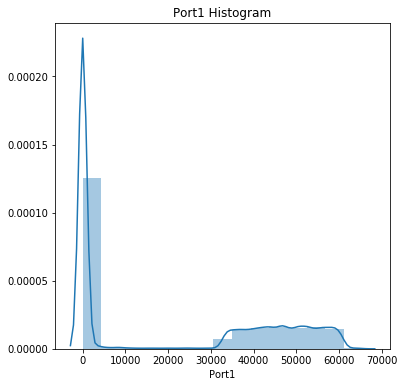

In [13]:
def plot_hist(data, var, bins):   
    plt.figure(figsize=(6,6))
    sns.distplot(data[var], bins=bins)
    plt.title(f'{var} Histogram')

plot_hist(data, 'Port1', 15)

* Most values concentrate in lower ports (as previously seen 23) and random connection ports
* Port 23 is by far the most used one
* 

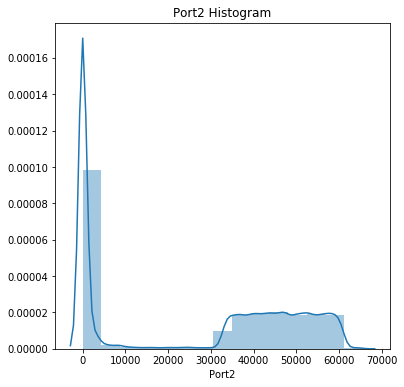

In [14]:
plot_hist(data, 'Port2', 15)

**same as above**

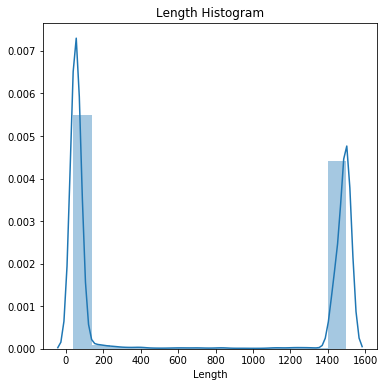

In [15]:
plot_hist(data, 'Length', 15)

* As stated in previous EDA most packages are either really small or big

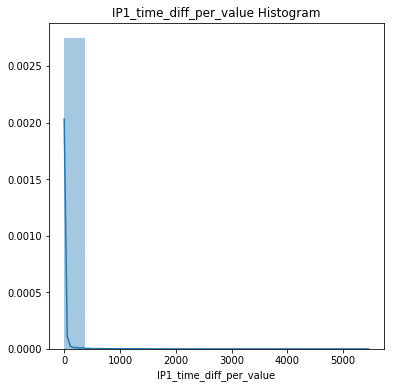

In [16]:
plot_hist(data, 'IP1_time_diff_per_value', 15)

Seem to have really large values, so lets split the histogram in 2, below 1 and above, gettingr rid of the zeros (filled NA as zeros previously)

In [46]:
idx_below = (data['IP1_time_diff_per_value'] < 1) & (data['IP1_time_diff_per_value'] != 0)
idx_above = (data['IP1_time_diff_per_value'] >= 1) & (data['IP1_time_diff_per_value'] != 0)
print('Number of observations below 1: {}'.format(idx_below.sum()))
print('Number of observations above 1: {}'.format(idx_above.sum()))

Number of observations below 1: 9555659
Number of observations above 1: 557696


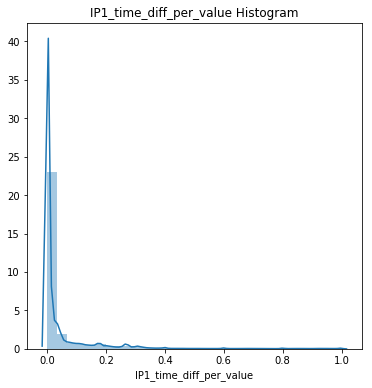

In [49]:
plot_hist(data[idx_below], 'IP1_time_diff_per_value', 30)

* Most connections are performed with little time differences between them

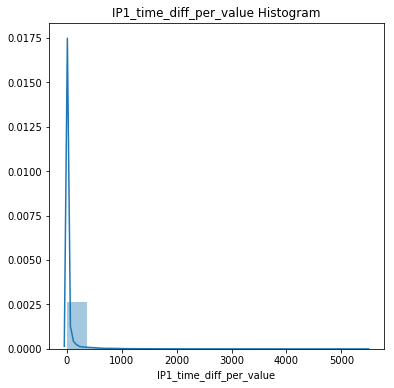

In [50]:
plot_hist(data[idx_above], 'IP1_time_diff_per_value', 15)

* Most values fall around a seconds, still the connections are not long term

Number of observations between a second a two seconds: 179218


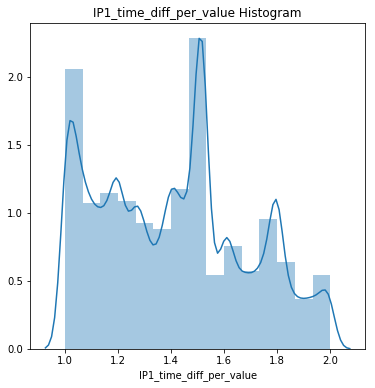

In [52]:
idx_between = (data['IP1_time_diff_per_value'] >= 1) & (data['IP1_time_diff_per_value'] != 0) & (data['IP1_time_diff_per_value'] < 2)
print(f'Number of observations between a second a two seconds: {idx_between.sum()}')
plot_hist(data[idx_between], 'IP1_time_diff_per_value', 15)


* Long term connections and above one second could be considered as rare (>5%)

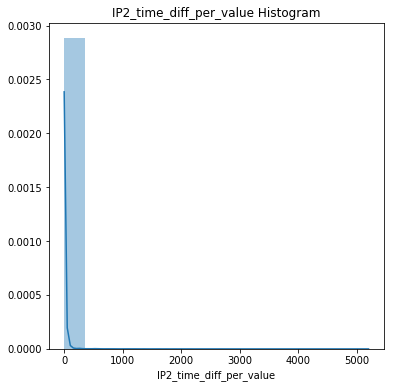

In [53]:
plot_hist(data, 'IP2_time_diff_per_value', 15)

Same process as IP1 time diff

In [54]:
idx_below = (data['IP2_time_diff_per_value'] < 1) & (data['IP2_time_diff_per_value'] != 0)
idx_above = (data['IP2_time_diff_per_value'] >= 1) & (data['IP2_time_diff_per_value'] != 0)
print('Number of observations below 1: {}'.format(idx_below.sum()))
print('Number of observations above 1: {}'.format(idx_above.sum()))

Number of observations below 1: 9142464
Number of observations above 1: 995479


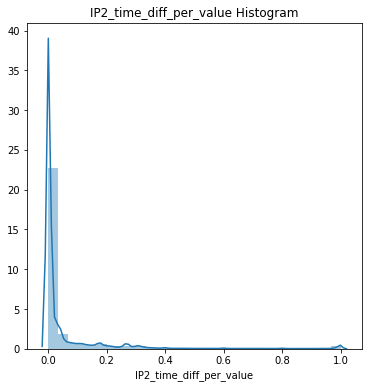

In [55]:
plot_hist(data[idx_below], 'IP2_time_diff_per_value', 30)

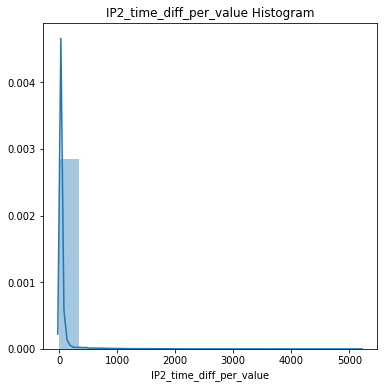

In [56]:
plot_hist(data[idx_above], 'IP2_time_diff_per_value', 15)

Number of observations between a second a two seconds: 294259


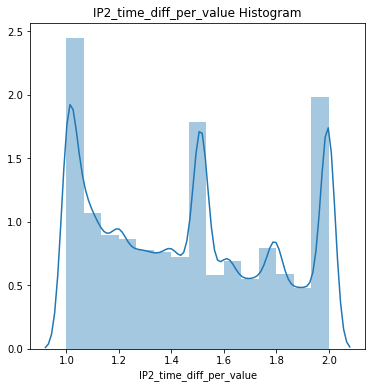

In [57]:
idx_between = (data['IP2_time_diff_per_value'] >= 1) & (data['IP2_time_diff_per_value'] != 0) & (data['IP2_time_diff_per_value'] < 2)
print(f'Number of observations between a second a two seconds: {idx_between.sum()}')
plot_hist(data[idx_between], 'IP2_time_diff_per_value', 15)

* Source connections seems to start faster than destiny connections are recieved
* Destiny connections have larger time differences

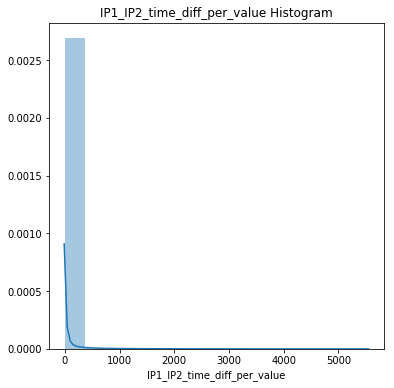

In [18]:
plot_hist(data, 'IP1_IP2_time_diff_per_value', 15)

In [58]:
idx_below = (data['IP1_IP2_time_diff_per_value'] < 1) & (data['IP1_IP2_time_diff_per_value'] != 0)
idx_above = (data['IP1_IP2_time_diff_per_value'] >= 1) & (data['IP1_IP2_time_diff_per_value'] != 0)
print('Number of observations below 1: {}'.format(idx_below.sum()))
print('Number of observations above 1: {}'.format(idx_above.sum()))

Number of observations below 1: 8778032
Number of observations above 1: 998265


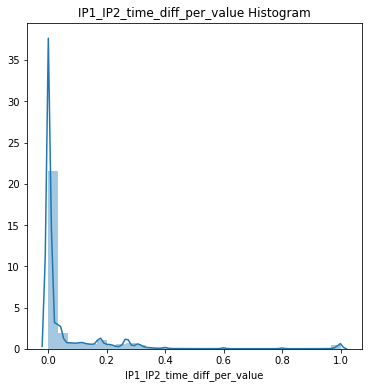

In [59]:
plot_hist(data[idx_below], 'IP1_IP2_time_diff_per_value', 30)

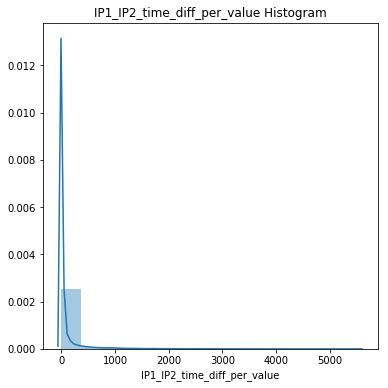

In [60]:
plot_hist(data[idx_above], 'IP1_IP2_time_diff_per_value', 15)

Number of observations between a second a two seconds: 298026


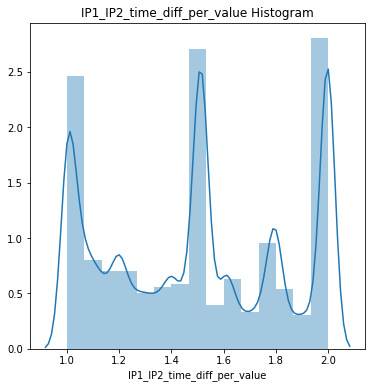

In [61]:
idx_between = (data['IP1_IP2_time_diff_per_value'] >= 1) & (data['IP1_IP2_time_diff_per_value'] != 0) & (data['IP1_IP2_time_diff_per_value'] < 2)
print(f'Number of observations between a second a two seconds: {idx_between.sum()}')
plot_hist(data[idx_between], 'IP1_IP2_time_diff_per_value', 15)

* Unique connections have larger (relative) differeneces than IP1 and IP2 alone
* Number of connections between 1 and 2 seconds have increased significantly (x5)
* Distribution between 1 and 2 shows a larger distribution for larger differences than differences using only one IP

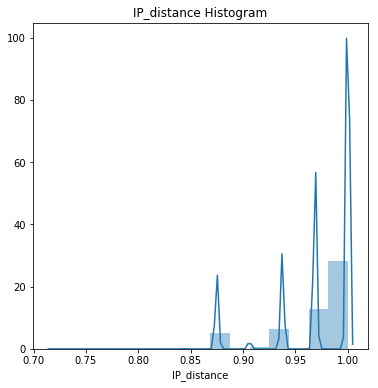

In [19]:
plot_hist(data, 'IP_distance', 15)

* Most IP connectios do not relate to each other (distance = 1)
* This variable will act as a categorical variable

<BarContainer object of 10 artists>

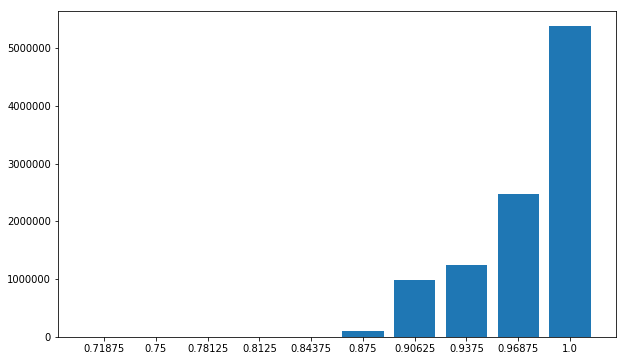

In [85]:
plt.figure(figsize=(10,6))
x = np.sort(data['IP_distance'].unique())
x = [str(c) for c in x]
plt.bar(x,data['IP_distance'].value_counts(ascending=True).values)

**Note**

Number of different digits:
* 0.96875 = one digit
* 0.9375  = two digits
* 0.90625 = thre digits
* 0.875   = four digits
* 0.84375 = five digits
* 0.75   = eight digits (same first net)

**Insights**
* Most IP connections are completly different
* Only a few IPs come from the first net
* Overall most IP connections are totally made from a complete different network
* Might not provide too much information

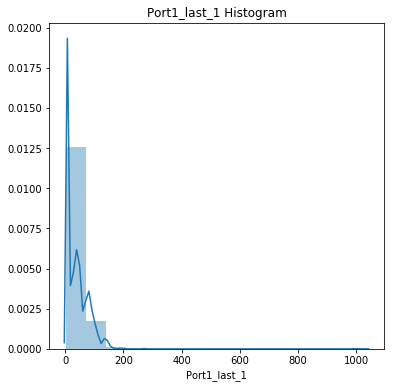

In [20]:
plot_hist(data, 'Port1_last_1', 15)

Lets explore a bit further:

In [99]:
idx_no_ones = data['Port1_last_1'] != 1
idx_below = (data['Port1_last_1'] < 200) & idx_no_ones
idx_above = data['Port1_last_1'] >= 200
print(f'Number of observations with ones: {idx_no_ones.sum()}')
print(f'Number of observations below 200 without ones: {idx_below.sum()}')
print(f'Number of observations above 200: {idx_above.sum()}')

Number of observations with ones: 9000473
Number of observations below 200 without ones: 8989396
Number of observations above 200: 11077


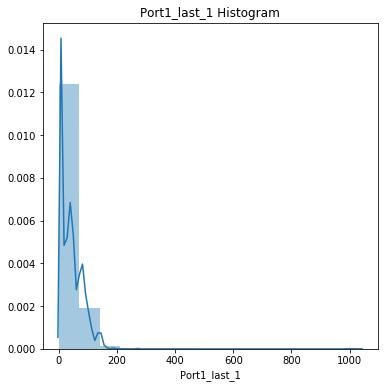

In [96]:
plot_hist(data[idx_no_ones], 'Port1_last_1', 15)

* The number of different ports it's still low
* Overall most ips establish connections with more than one port

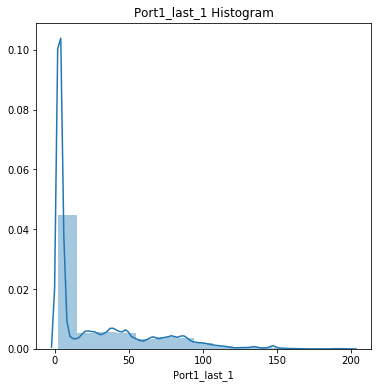

In [100]:
plot_hist(data[idx_below], 'Port1_last_1', 15)

In [104]:
data[idx_below]['Port1_last_1'].value_counts().iloc[:10]

3.0     1577560
2.0     1549508
4.0     1037151
5.0      508469
6.0      241640
7.0       80695
38.0      71503
48.0      67141
37.0      64843
49.0      63178
Name: Port1_last_1, dtype: int64

Most connections have below 7 different port in the same minute

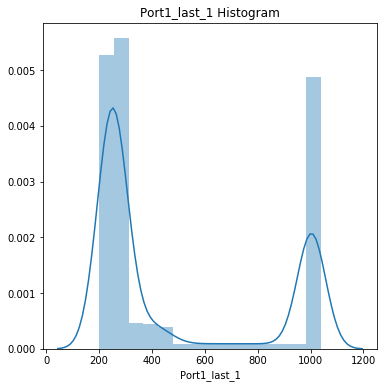

In [101]:
plot_hist(data[idx_above], 'Port1_last_1', 15)

The distribution is either around 200 different ports or a thousand

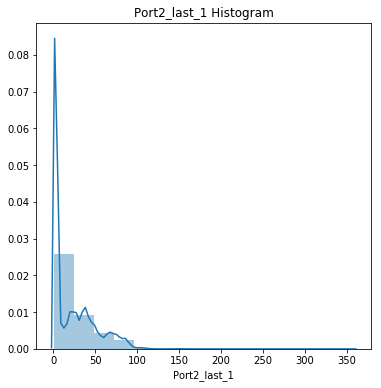

In [21]:
plot_hist(data, 'Port2_last_1', 15)

In [110]:
idx_no_ones = data['Port2_last_1'] != 1
idx_below = (data['Port2_last_1'] < 200) & idx_no_ones
idx_above = data['Port2_last_1'] >= 200
print(f'Number of observations with ones: {idx_no_ones.sum()}')
print(f'Number of observations below 200 without ones: {idx_below.sum()}')
print(f'Number of observations above 200: {idx_above.sum()}')

Number of observations with ones: 9497158
Number of observations below 200 without ones: 9493525
Number of observations above 200: 3633


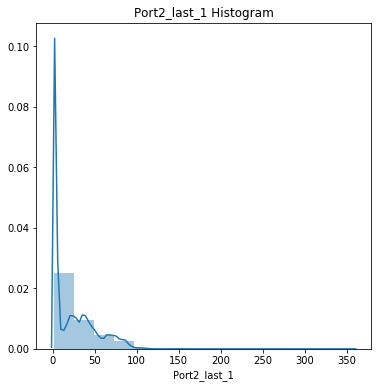

In [111]:
plot_hist(data[idx_no_ones], 'Port2_last_1', 15)

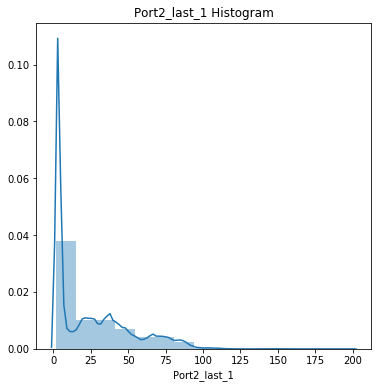

In [112]:
plot_hist(data[idx_below], 'Port2_last_1', 15)

In [113]:
data[idx_below]['Port2_last_1'].value_counts().iloc[:10]

3.0     1291247
2.0     1186911
4.0      910774
5.0      487663
6.0      244688
38.0     130039
37.0     122967
21.0     111635
25.0     108307
24.0     107511
Name: Port2_last_1, dtype: int64

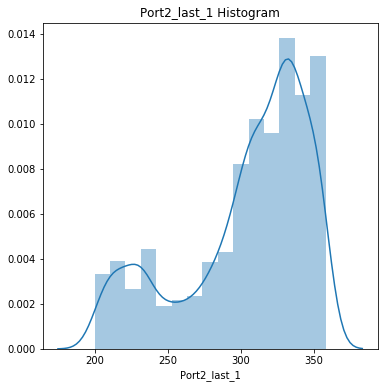

In [114]:
plot_hist(data[idx_above], 'Port2_last_1', 15)

* Distribution differs regarding Port1
* Most common number of different ports its below 7 (as Port1)
* Less number of different ports above 200 and more evenly distributed


## Boxplots

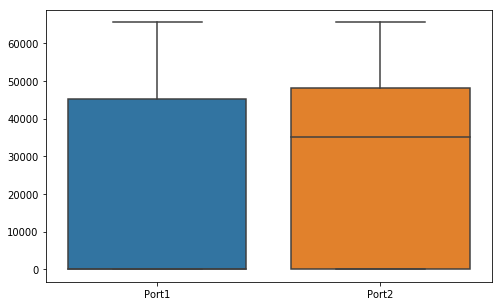

In [118]:
plt.figure(figsize=(8,5))
sns.boxplot(data=data[['Port1', 'Port2']])

* Values for both ports are all over the spectrum
* Port2 is more distributed along th spectrum, whereas port1 mainly focus on low ports (23)

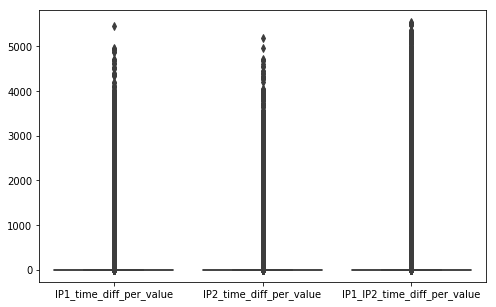

In [120]:
plt.figure(figsize=(8,5))
box_vars = ['IP1_time_diff_per_value', 'IP2_time_diff_per_value', 'IP1_IP2_time_diff_per_value']
sns.boxplot(data=data[box_vars])

Most values are concentrated in low time differences, but there are a lot of points along the spectrum, lets focus on data below 1 second

In [122]:
idx = (data['IP1_time_diff_per_value'] < 1) &\
(data['IP2_time_diff_per_value'] < 1) &\
(data['IP1_IP2_time_diff_per_value'] < 1)
                                             

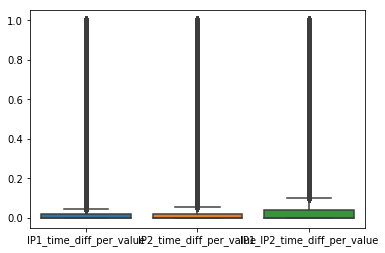

In [123]:
sns.boxplot(data=data[box_vars][idx])

Time differences regards really low values, so lets use < 0.001

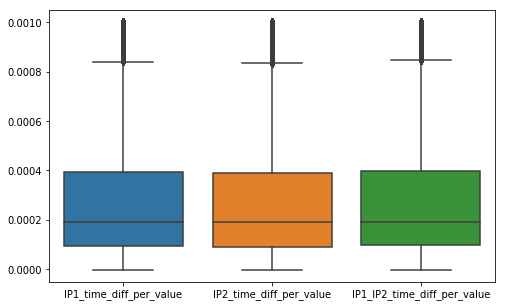

In [128]:
idx = (data['IP1_time_diff_per_value'] < 0.001) &\
(data['IP2_time_diff_per_value'] < 0.001) &\
(data['IP1_IP2_time_diff_per_value'] < 0.001)
plt.figure(figsize=(8,5))
sns.boxplot(data=data[box_vars][idx])

In [129]:
print(f'Number of values below 0.001: {idx.sum()}')

Number of values below 0.001: 4255436


* Overall distribution follows the same pattern in all three
* In the subset below 1 second IP1-IP2 its a little more disperse
* Beloww 0.001 the pattern seems to be the same

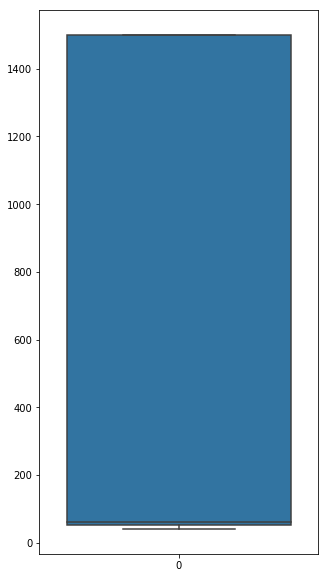

In [131]:
plt.figure(figsize=(5,10))
sns.boxplot(data=data['Length'])

Distributed along the axis, but mostly the packet length is small

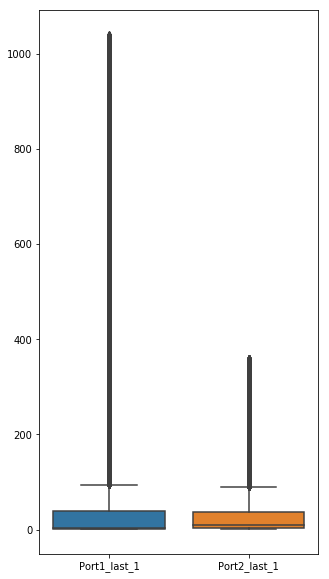

In [136]:
plt.figure(figsize=(5,10))
sns.boxplot(data=data[['Port1_last_1', 'Port2_last_1']])

Les use explore below 200

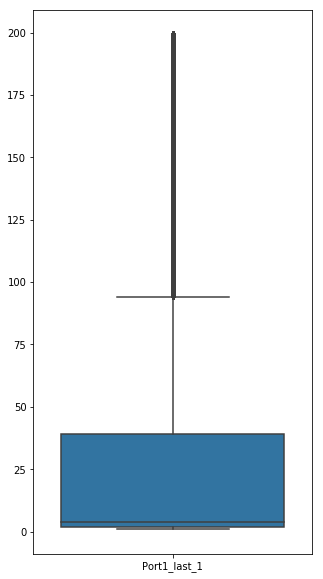

In [141]:
idx = data['Port1_last_1'] < 200
idx_1 = data['Port2_last_1'] < 200
plt.figure(figsize=(5,10))
sns.boxplot(data=data[['Port1_last_1']][idx])

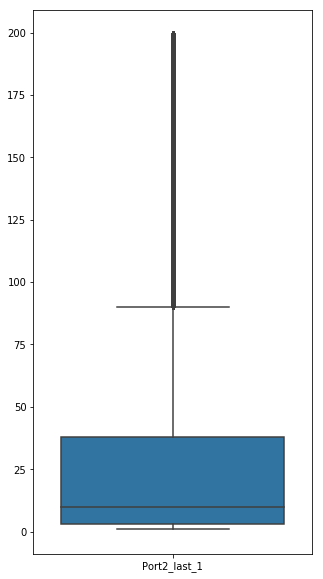

In [142]:
plt.figure(figsize=(5,10))
sns.boxplot(data=data[['Port2_last_1']][idx_1])

* Overall both ports have a wide range of unique ports in the last minute
* IQR (below 200) seems to be really close
* Median for port2 is higher than port1

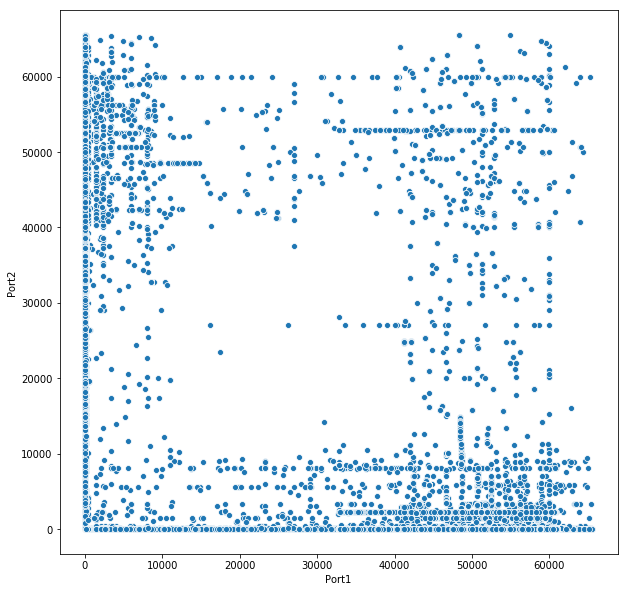

In [160]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data[['Port1', 'Port2']].sample(100000), x='Port1', y='Port2')

Low ports connect to high ports and viceversa

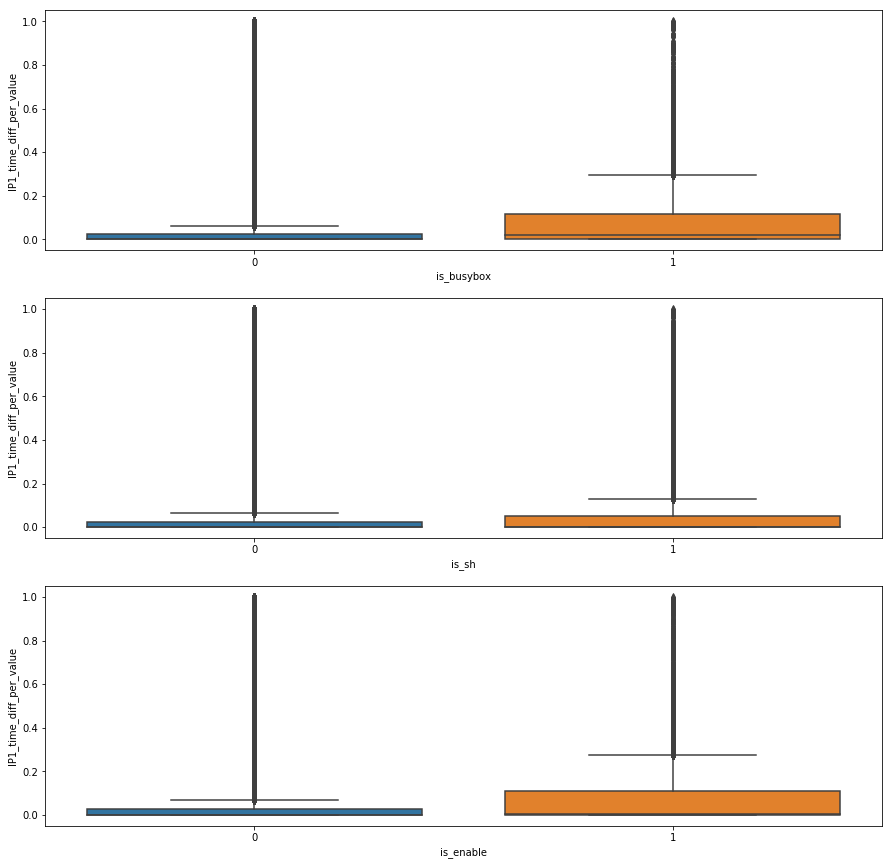

In [175]:
idx = (data['IP1_time_diff_per_value'] < 1)
fig, ax = plt.subplots(nrows=3, figsize=(15,15))
sns.boxplot(data=data[idx], y='IP1_time_diff_per_value', x='is_busybox', ax=ax[0]) 
sns.boxplot(data=data[idx], y='IP1_time_diff_per_value', x='is_sh', ax=ax[1]) 
sns.boxplot(data=data[idx], y='IP1_time_diff_per_value', x='is_enable', ax=ax[2])


* is_busybox and is_enable have a greater distribution on diff times
* Distribution along zero values are almost equal for all three (most of the values are zero values)

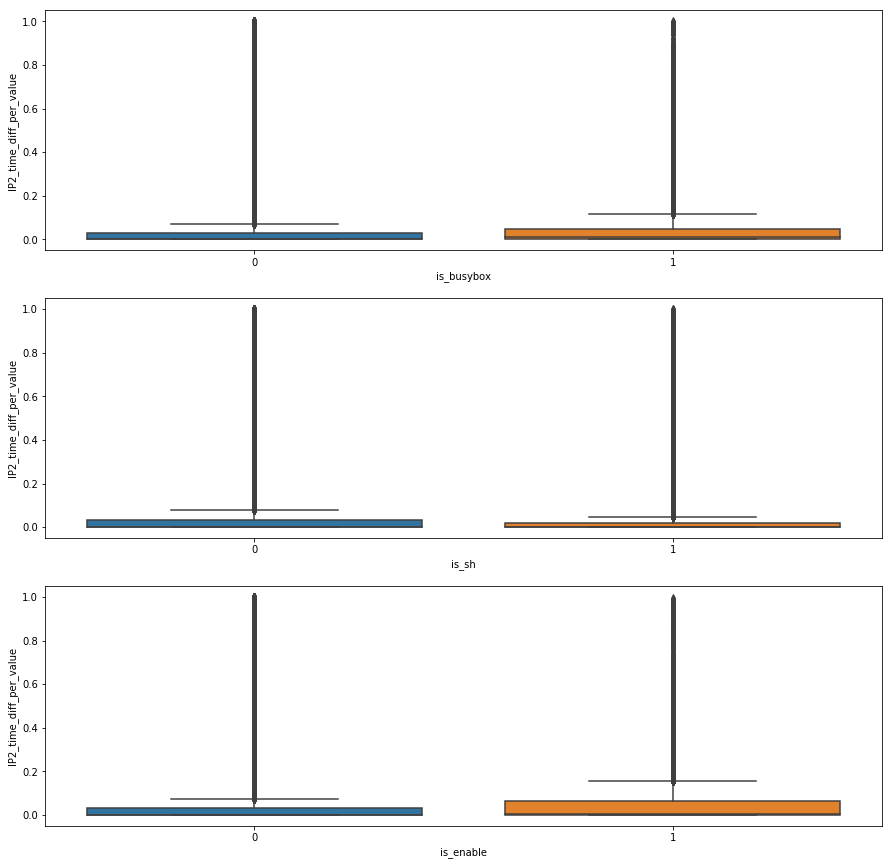

In [176]:
idx = (data['IP2_time_diff_per_value'] < 1)
fig, ax = plt.subplots(nrows=3, figsize=(15,15))
sns.boxplot(data=data[idx], y='IP2_time_diff_per_value', x='is_busybox', ax=ax[0]) 
sns.boxplot(data=data[idx], y='IP2_time_diff_per_value', x='is_sh', ax=ax[1]) 
sns.boxplot(data=data[idx], y='IP2_time_diff_per_value', x='is_enable', ax=ax[2])

* Less distributed than IP1
* But is_enable and is_busybox have greater dispersion than is_sh

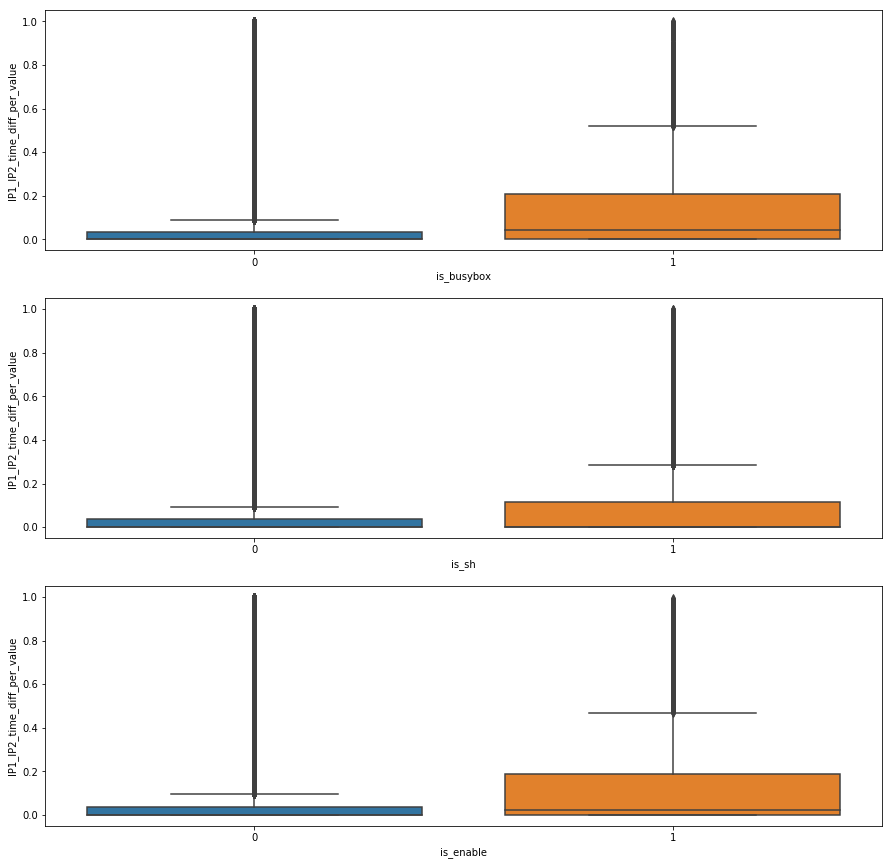

In [177]:
idx = (data['IP1_IP2_time_diff_per_value'] < 1)
fig, ax = plt.subplots(nrows=3, figsize=(15,15))
sns.boxplot(data=data[idx], y='IP1_IP2_time_diff_per_value', x='is_busybox', ax=ax[0]) 
sns.boxplot(data=data[idx], y='IP1_IP2_time_diff_per_value', x='is_sh', ax=ax[1]) 
sns.boxplot(data=data[idx], y='IP1_IP2_time_diff_per_value', x='is_enable', ax=ax[2])

* Dispersion of possitive values is greater than IP1 and IP2 alone
* Possitive values are still centered around small differences times

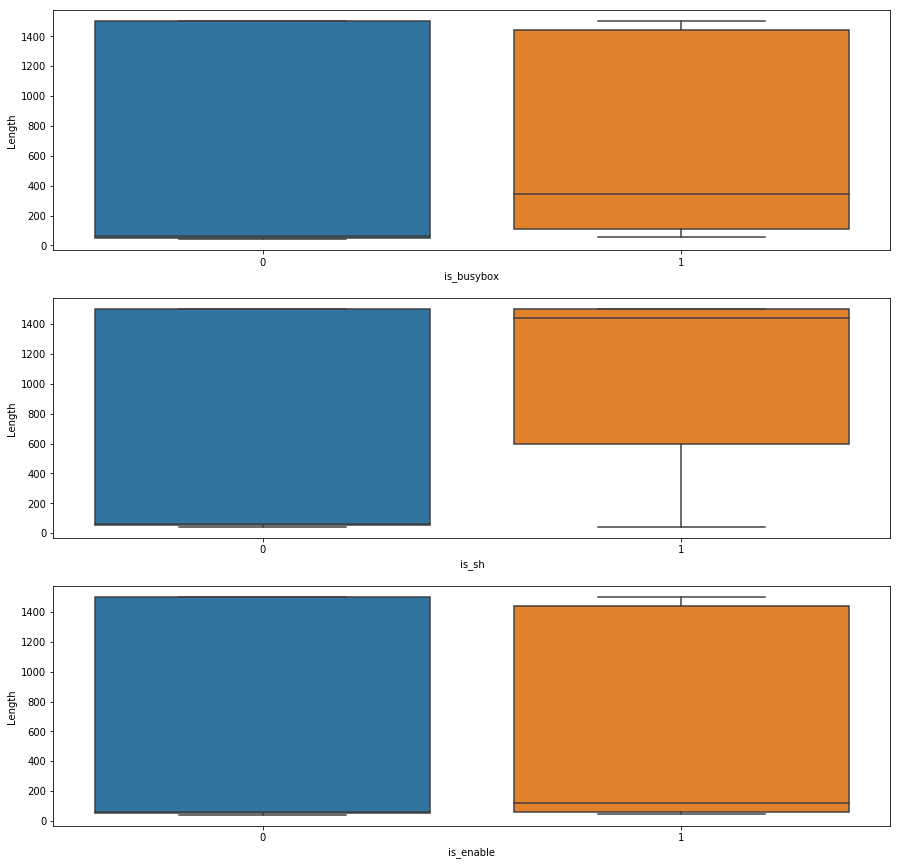

In [181]:
fig, ax = plt.subplots(nrows=3, figsize=(15,15))
sns.boxplot(data=data, y='Length', x='is_busybox', ax=ax[0]) 
sns.boxplot(data=data, y='Length', x='is_sh', ax=ax[1]) 
sns.boxplot(data=data, y='Length', x='is_enable', ax=ax[2])

* Most is_sh values have lengths greater than 600
* is_enable and is_busybox are dispersed similarly for all values
* is_busybox has the higher median of all three

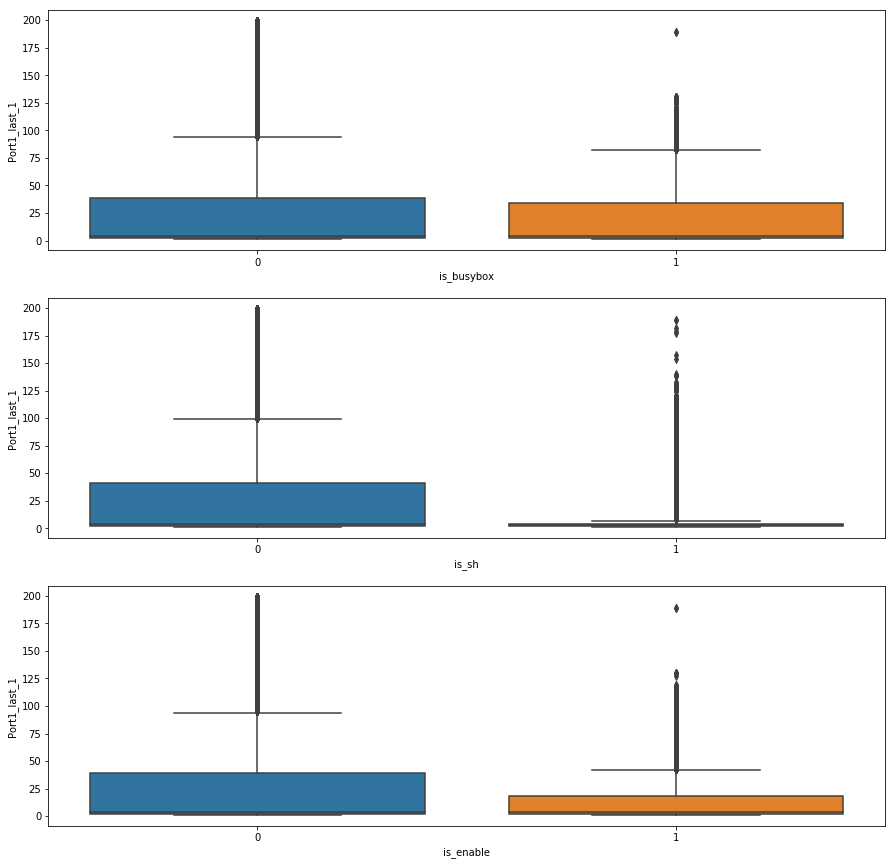

In [182]:
idx = data['Port1_last_1'] < 200
fig, ax = plt.subplots(nrows=3, figsize=(15,15))
sns.boxplot(data=data[idx], y='Port1_last_1', x='is_busybox', ax=ax[0]) 
sns.boxplot(data=data[idx], y='Port1_last_1', x='is_sh', ax=ax[1]) 
sns.boxplot(data=data[idx], y='Port1_last_1', x='is_enable', ax=ax[2])

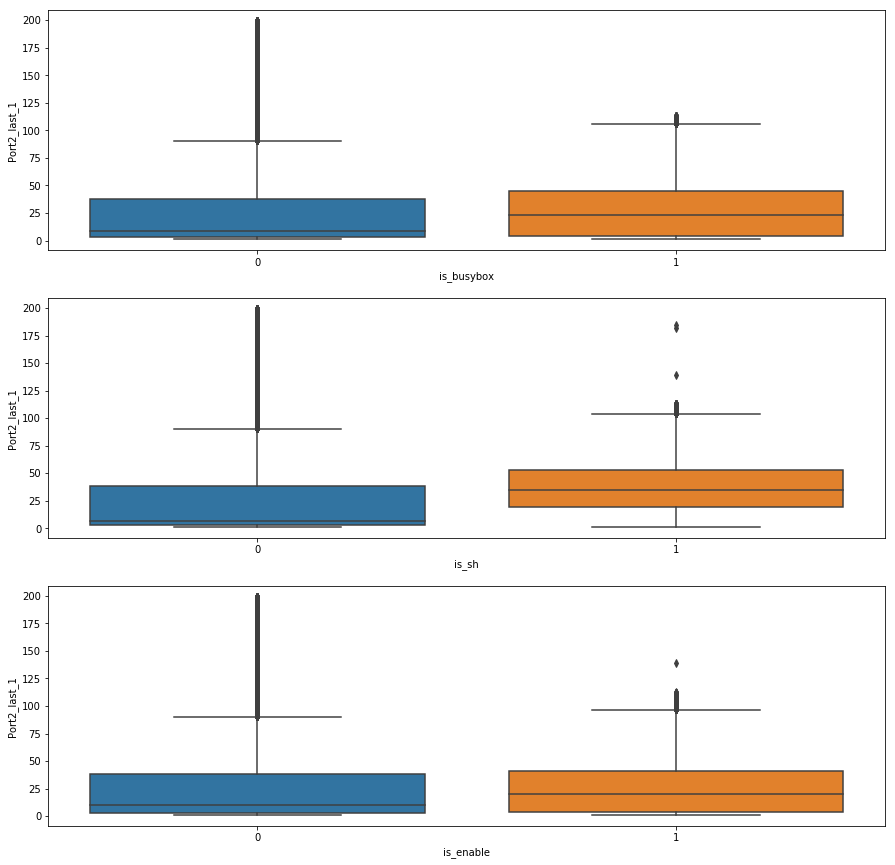

In [184]:
idx = data['Port2_last_1'] < 200
fig, ax = plt.subplots(nrows=3, figsize=(15,15))
sns.boxplot(data=data[idx], y='Port2_last_1', x='is_busybox', ax=ax[0]) 
sns.boxplot(data=data[idx], y='Port2_last_1', x='is_sh', ax=ax[1]) 
sns.boxplot(data=data[idx], y='Port2_last_1', x='is_enable', ax=ax[2])

Positive values are more disperse than negative ones and more centered

## Summary
* Ports are negatively correlated this might be due to starting connections beaing above port 44000 and the main port2 being 23 for telnet
* The higher the initial port packet lenght decreases
* The higher source port, Port2_last_1 decreases, meaning that connections might not be port scans
* Length and destiny port seem to be correlated, higher lengths to higher ports
* IP_Distances shows correlation to IP nets and host, meaning that it migh provide valuable information
* Ports_last* are negatively correlated, meaning that usually is one port to many or many to one
* Packet length is either big or small
* Most time differences are small
* Number of unique ports in the last minute is usually greater than 1. Also most values are below 7 unique ports, but there are still various observatiosn with 30+ unique ports
* Obervations with nº of unique ports between 200 and 1000 are somewhat common
* Numner of ports is greater regarding source port than destiny port
* Distribution on n ports below 200 is similar for port1 and 2, but 2 has a higher median
* is_busybox and is_enable have somewhat similar distribution but less disperse

### TO DO's
* Create dataset
* FE on numerical -> mean, sum, max, min, std
* FE on binary    -> mean, sum, std
* Binary variable regarding if the IP was source or destiny